In [108]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [61]:
dataset=pd.read_csv('Boston.csv')
dataset.drop(dataset.columns[[0]],axis=1,inplace=True)

In [63]:
dataset.dtypes
dataset.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [64]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [67]:
dataset.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [69]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<Axes: >

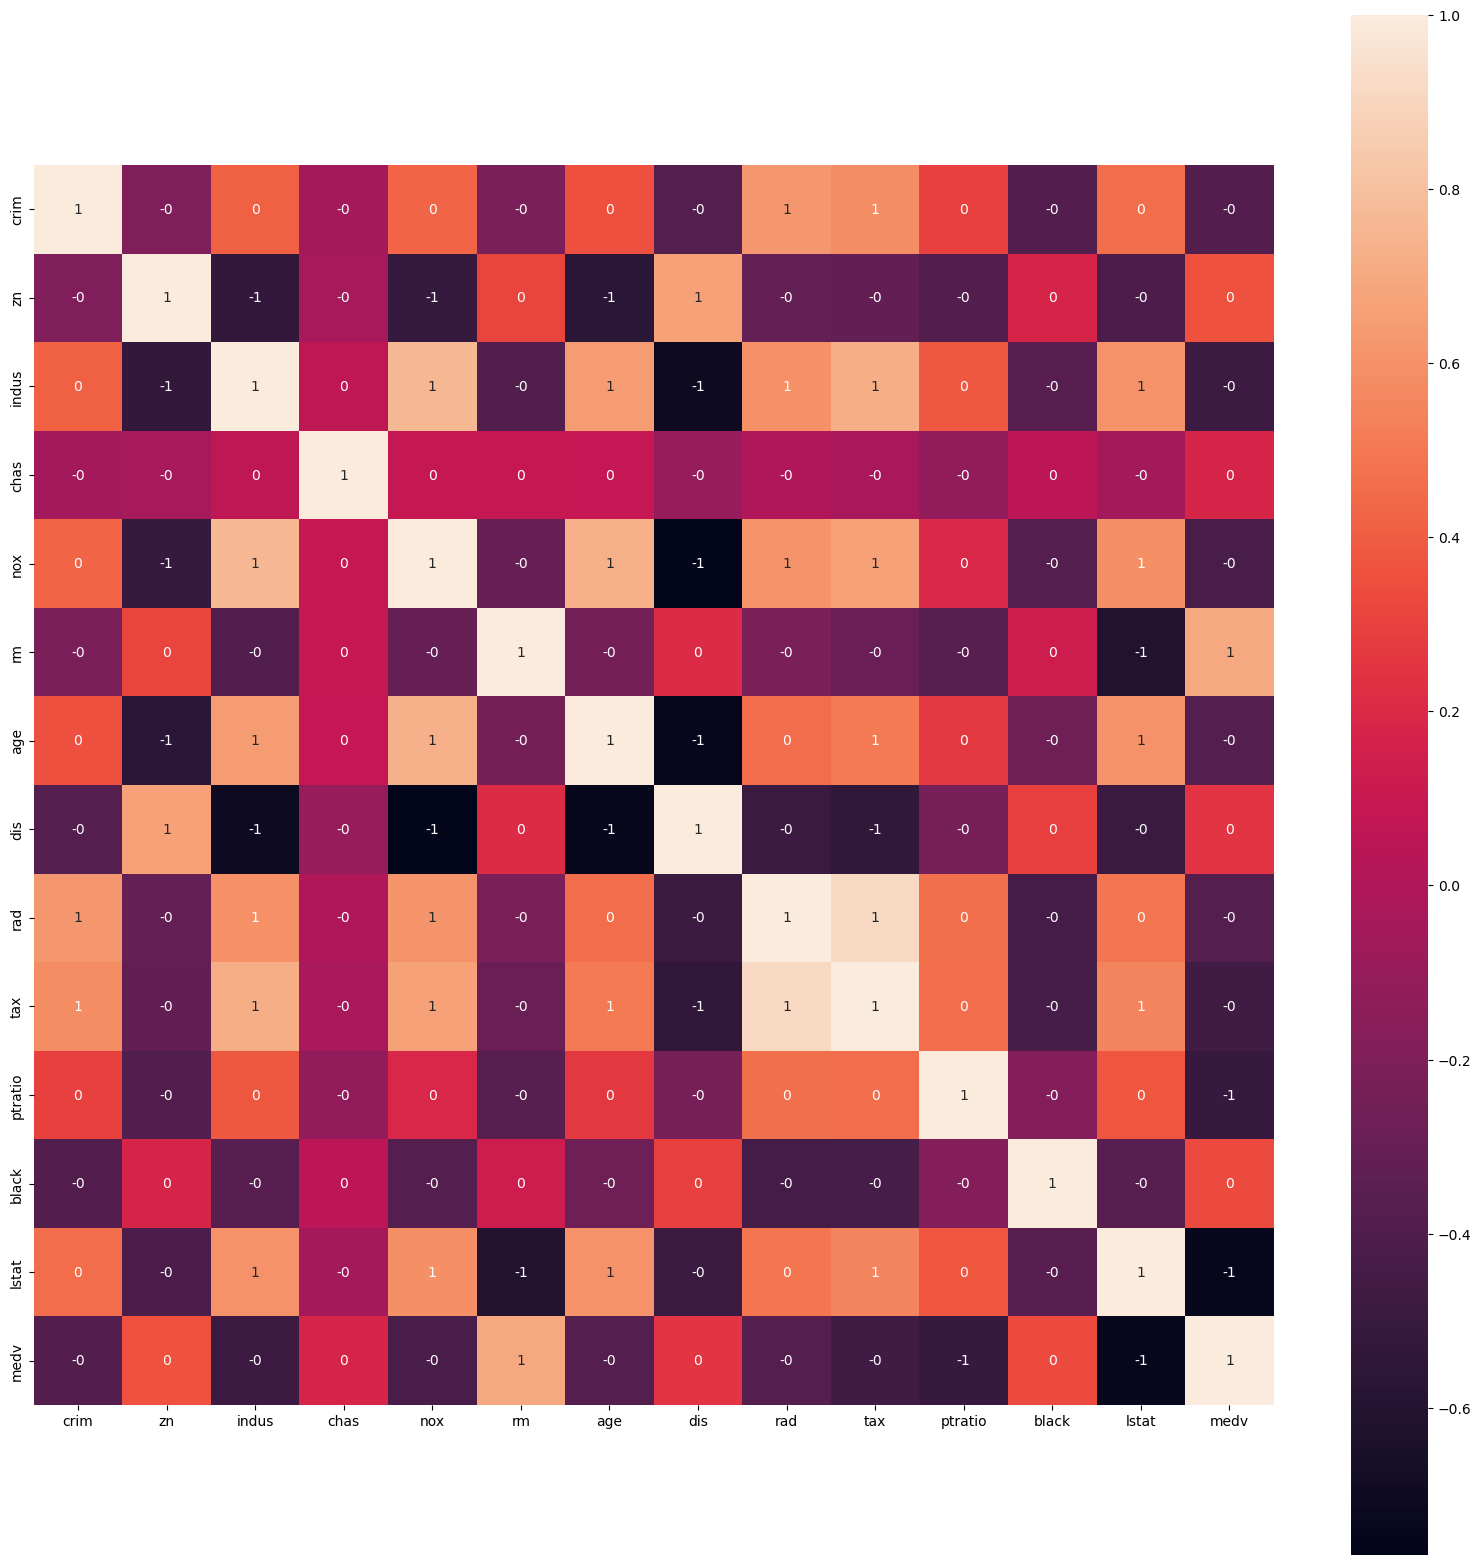

In [82]:
co=dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(co,annot=True,square=True,)

In [84]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [88]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [95]:
pd.DataFrame([x_train.columns,lm.coef_]).T

,0,1
0,crim,-0.098907
1,zn,0.046475
2,indus,0.027269
3,chas,2.877805
4,nox,-18.474318
5,rm,4.157332
6,age,-0.008515
7,dis,-1.438862
8,rad,0.284922
9,tax,-0.012345


In [102]:
y_pred=lm.predict(x_test)
metrics.r2_score(y_test,y_pred)

0.7121782493625426

TypeError: distplot() got an unexpected keyword argument 'bin'

In [53]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.433904,0.920620,-1.332166,-0.30429,-0.706701,0.861042,0.049935,-0.302105,-0.304673,-1.100274,-0.023847,0.439877,-0.747356
1,-0.436711,1.856807,-1.098590,-0.30429,-0.604883,0.639842,-0.442468,0.892395,-0.532213,-0.229548,-0.396970,0.439877,-0.795511
2,-0.412765,-0.483661,-0.641657,-0.30429,-0.910337,-0.323027,0.588389,0.872388,-0.759754,-1.035558,-0.257049,0.393795,0.803261
3,-0.432897,0.048264,-0.764284,-0.30429,-1.241246,-0.542781,-1.682329,1.251250,-0.645983,-0.376630,0.209355,0.432234,-0.668930
4,-0.007602,-0.483661,0.991914,-0.30429,1.821781,-1.288788,0.967432,-0.807708,1.629421,1.511905,0.815679,0.261418,-0.381371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.079806,-0.483661,0.991914,-0.30429,0.243601,-0.362062,0.907211,-0.603096,1.629421,1.511905,0.815679,-0.286920,1.149983
148,-0.425361,-0.483661,-1.228516,-0.30429,-0.935792,0.537194,-0.392873,-0.155686,-0.873524,-0.782577,-0.210409,0.008740,-0.868433
149,-0.428774,-0.483661,2.094099,-0.30429,0.218147,-0.422784,0.850531,-0.815533,-0.873524,-1.300306,0.302635,0.231509,0.683560
150,-0.376249,0.367419,-1.070853,-0.30429,0.778146,1.372837,0.457318,-0.803725,-0.532213,-0.853176,-2.542427,0.394459,-0.463924


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
reg=LinearRegression()

In [56]:

reg.fit(x_train,y_train)

LinearRegression()

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
y_pred=reg.predict(x_test)

In [109]:
rf=RandomForestRegressor()

In [110]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [114]:
y_pr=rf.predict(x_test)

In [115]:
metrics.r2_score(y_test,y_pr)

0.8633287002209629

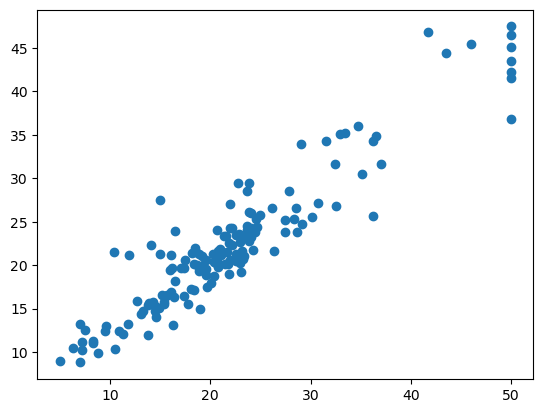

In [117]:
plt.scatter(y_test, y_pr)